In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from matplotlib.gridspec import GridSpec


In [2]:
path = "/home/unix/sjohri/valab_sjohri/projects/methods/testing_parameters/melanoma-tirosh/results=251-vision-C2-CP-KEGG/"
de_summary_all_vision_hallmark = []
for i in range(0,16):
    de_summary_all_vision_hallmark.append(pd.read_csv(path+str(i)+"/de_summary_all.csv", index_col=0))

In [3]:
df = de_summary_all_vision_hallmark[15][(de_summary_all_vision_hallmark[15].nonrobust==True) & (de_summary_all_vision_hallmark[15].p<=0.05)]
df_plot = df.iloc[:,3:(df.shape[1]-1)]
size=50
df_plot = df_plot.iloc[:size,:]
df_plot.columns = [x.split("_")[1] for x in df_plot.columns]
df_plot

,Mel102,Mel103,Mel105,Mel106,Mel110,Mel112,Mel121.1,Mel128,Mel129pa,Mel194,...,Mel78,Mel79,Mel80,Mel81,Mel82,Mel84,Mel88,Mel89,Mel94,Mel98
KEGG_GAP_JUNCTION,1.008400,1.008400,1.008400,1.008400,0.816733,1.008400,1.008400,1.008400,1.008400,1.008400,...,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400
KEGG_HOMOLOGOUS_RECOMBINATION,1.008769,1.008769,1.008769,1.008769,0.808765,1.008769,1.008769,1.008769,1.008769,1.008769,...,1.008769,1.008769,1.008769,1.008769,1.008769,1.008769,1.008769,1.008769,1.008769,1.008769
KEGG_OOCYTE_MEIOSIS,1.046031,1.046031,1.046031,1.046031,0.031873,1.046031,1.046031,1.046031,1.046031,1.046031,...,1.046031,1.046031,1.046031,1.046031,1.046031,1.046031,1.046031,1.046031,1.046031,1.046031
KEGG_HUNTINGTONS_DISEASE,1.050809,0.980839,1.050809,1.050809,0.000000,1.050809,1.050809,1.050809,1.050809,1.050809,...,1.050809,1.050809,1.050809,1.050809,1.050809,1.050809,1.050809,1.050809,1.050809,1.050809
KEGG_GLYCOLYSIS_GLUCONEOGENESIS,1.065406,1.065406,1.065406,0.858126,1.065406,1.065406,1.065406,1.065406,1.065406,1.065406,...,1.065406,0.853756,1.065406,1.065406,1.065406,1.065406,1.065406,1.065406,1.065406,0.028377
KEGG_GLUTATHIONE_METABOLISM,1.038946,1.038946,1.038946,1.038946,0.345255,1.038946,1.038946,1.038946,1.038946,1.038946,...,1.038946,1.038946,1.038946,1.012967,1.038946,1.038946,1.038946,1.038946,1.038946,0.883947
KEGG_MISMATCH_REPAIR,1.047619,1.047619,1.047619,1.047619,0.000000,1.047619,1.047619,1.047619,1.047619,1.047619,...,1.047619,1.047619,1.047619,1.047619,1.047619,1.047619,1.047619,1.047619,1.047619,1.047619
KEGG_P53_SIGNALING_PATHWAY,1.105727,1.105727,1.105727,1.105727,0.004195,1.105727,1.105727,1.105727,0.050449,1.105727,...,1.105727,1.105727,1.105727,1.105727,1.105727,1.105727,1.105727,1.105727,1.105727,0.940358
KEGG_CARDIAC_MUSCLE_CONTRACTION,1.089686,0.141908,1.127399,0.453518,0.000000,1.127399,1.127399,1.127399,1.127399,1.127399,...,1.127399,1.127399,1.127399,1.127399,1.127399,1.127399,1.127399,1.127399,1.127399,1.127399
KEGG_DNA_REPLICATION,1.054018,1.054018,1.054018,1.049618,0.000000,1.054018,1.054018,1.054018,1.054018,1.054018,...,1.054018,0.935815,1.054018,1.054018,1.054018,1.054018,1.054018,1.036430,1.054018,1.054018


In [4]:
q25 = df_plot.T.quantile(0.25).to_numpy()
q75 = df_plot.T.quantile(0.75).to_numpy()
outlier_bottom_lim = q25 - 1.5 * (q75 - q25)

mat = pd.DataFrame(index = df_plot.index, columns = df_plot.columns)
for i in range(df_plot.shape[0]):
    fr_ratio = df_plot.iloc[i,:]
    pats = [x for x in fr_ratio[fr_ratio<outlier_bottom_lim[i]].index.to_list()]
    mat.iloc[i,:] = mat.columns.isin(pats).astype(int)

In [5]:
mat.loc["sum",] = mat.sum(axis=0)
mat = mat.T.sort_values(by=["sum"]).T.drop(["sum"])

In [6]:
mat["sum"] = mat.sum(axis=1)
mat = mat.sort_values(by=["sum"]).drop(["sum"], axis=1)
mat

,Mel60,Mel105,Mel84,Mel121.1,Mel82,Mel53,Mel94,Mel128,Mel89,Mel112,...,Mel81,Mel98,Mel79,Mel80,Mel102,Mel78,Mel103,Mel129pa,Mel106,Mel110
KEGG_BASAL_TRANSCRIPTION_FACTORS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KEGG_ENDOCYTOSIS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KEGG_DRUG_METABOLISM_OTHER_ENZYMES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KEGG_NEUROTROPHIN_SIGNALING_PATHWAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KEGG_PHENYLALANINE_METABOLISM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KEGG_VASOPRESSIN_REGULATED_WATER_REABSORPTION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KEGG_GLIOMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KEGG_INSULIN_SIGNALING_PATHWAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KEGG_GAP_JUNCTION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
df_main = df_plot.loc[mat.index,mat.columns]
df_main

,Mel60,Mel105,Mel84,Mel121.1,Mel82,Mel53,Mel94,Mel128,Mel89,Mel112,...,Mel81,Mel98,Mel79,Mel80,Mel102,Mel78,Mel103,Mel129pa,Mel106,Mel110
KEGG_BASAL_TRANSCRIPTION_FACTORS,1.024339,1.024339,0.975713,1.079289,0.849042,0.915219,1.189981,0.652785,1.490418,0.419371,...,1.490418,1.171459,0.000000,1.446121,0.078133,1.490418,0.747517,1.370569,1.408284,0.000000
KEGG_ENDOCYTOSIS,1.355664,1.313936,1.171994,1.142640,1.331801,1.325843,1.290158,1.415534,0.000000,1.415534,...,1.415534,1.409534,0.000000,0.279024,0.000000,1.415534,1.415534,1.415534,0.000000,0.000000
KEGG_DRUG_METABOLISM_OTHER_ENZYMES,1.173866,1.056699,0.679929,1.056699,1.165457,1.056699,1.165457,0.268573,2.082988,1.182280,...,0.000000,1.947487,2.082988,0.000000,0.015172,1.645926,0.338698,0.022766,2.082988,2.082988
KEGG_NEUROTROPHIN_SIGNALING_PATHWAY,1.157138,1.620127,1.746734,1.286465,1.006816,1.643763,1.021760,0.158174,1.858633,0.213726,...,0.013665,0.887956,1.858633,1.858633,1.858633,0.000000,0.000000,0.000000,1.858633,1.858633
KEGG_PHENYLALANINE_METABOLISM,1.482246,1.172806,0.857903,1.165868,1.418281,1.165868,1.131241,1.640086,0.018782,1.027976,...,1.690753,0.000000,0.037596,1.690753,1.690753,1.489375,0.375361,1.632865,0.000000,1.611230
KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS,1.144026,1.556943,1.606079,1.403840,1.321166,1.480142,1.307443,1.090061,1.641301,0.461582,...,1.648358,0.000000,0.160000,1.648358,1.648358,0.000000,0.589678,0.006111,1.648358,1.648358
KEGG_VASOPRESSIN_REGULATED_WATER_REABSORPTION,1.214463,1.208057,1.240122,1.188861,1.336848,1.201655,1.208057,1.023816,1.375764,1.246545,...,1.545913,0.338911,1.545913,1.434383,1.545913,0.291545,0.000000,0.000000,1.545913,1.036428
KEGG_GLIOMA,1.320118,1.288925,1.445731,1.351395,1.245394,1.483680,1.370201,0.652615,1.464690,1.338874,...,1.445731,0.055739,1.483680,1.407905,1.490016,0.016692,1.158819,0.000000,1.490016,0.442382
KEGG_INSULIN_SIGNALING_PATHWAY,1.254882,1.308782,1.375000,1.302781,1.278807,1.393125,1.350877,1.171531,1.423395,0.872883,...,1.429459,0.593110,1.429459,1.429459,1.429459,0.000000,0.010700,0.000000,1.429459,1.429459
KEGG_GAP_JUNCTION,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,...,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,0.816733


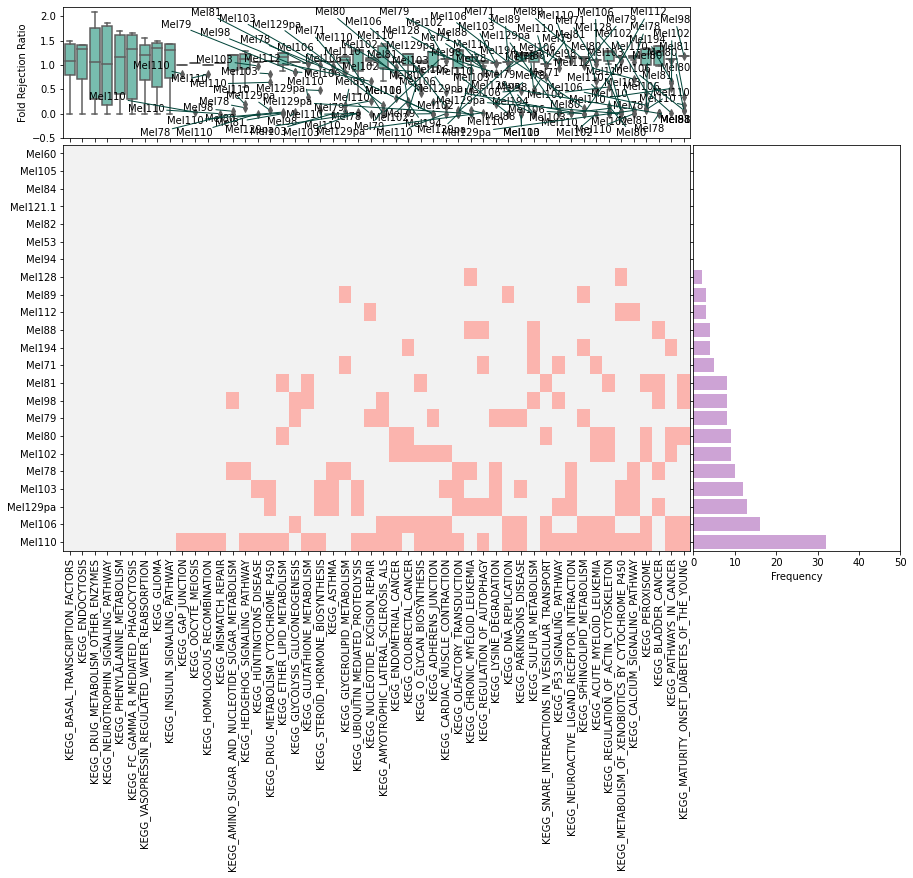

In [54]:
fig = plt.figure(figsize=(15,10))
gs = GridSpec(4,4)
gs.update(wspace=0.015, hspace=0.05)
ax_main = plt.subplot(gs[1:4, :3])
ax_yDist = plt.subplot(gs[1:4, 3], sharey=ax_main)
ax_xDist = plt.subplot(gs[0:1, :3], sharex=ax_main)
ax_main.imshow(mat.T, cmap="Pastel1_r",interpolation="nearest",aspect="auto")
# ax_main.grid(color='#E8D5DE', linestyle='-', linewidth=1)
sns.boxplot(data=df_main.T, color="#6CC9B6",ax=ax_xDist)
ax_xDist.set_xticks([])
ax_yDist.barh(range(mat.shape[1]),mat.T.sum(axis=1),color="#CDA3D5")

ax_main.set_yticks(range(0,mat.T.shape[0]))
ax_main.set_yticklabels(mat.T.index.to_list());
ax_main.set_xticks(range(0,mat.T.shape[1]))
ax_main.set_xticklabels(mat.T.columns.to_list(), rotation=90);
ax_yDist.yaxis.set_tick_params(which='both', labelright=False, labelleft=False)
ax_xDist.xaxis.set_tick_params(which='both', labeltop=False, labelbottom=False)

ax_xDist.set_ylabel("Fold Rejection Ratio");
ax_yDist.set_xlabel("Frequency");

q25 = df_main.T.quantile(0.25).to_numpy()
q75 = df_main.T.quantile(0.75).to_numpy()
outlier_top_lim = q75 + 1.5 * (q75 - q25)
outlier_bottom_lim = q25 - 1.5 * (q75 - q25)
texts = []
for i in range(df_main.shape[0]):
    fr_ratio = df_main.iloc[i,:]
    pats = [x for x in fr_ratio[fr_ratio<outlier_bottom_lim[i]].index.to_list()]
    texts.extend([ax_xDist.text(i,fr_ratio[fr_ratio<outlier_bottom_lim[i]][j],pats[j],ha='center', va='center') for j in range(len(pats))])
ax_xDist.set_ylim(bottom=-0.5)
adjust_text(texts,arrowprops=dict(arrowstyle='-',color='#014439'));
ax_yDist.set_xlim([0,mat.T.shape[1]]);

In [ ]:
with sns.plotting_context("notebook", rc={'axes.titlesize' : 12,
                                           'axes.labelsize' : 8,
                                           'xtick.labelsize' : 10,
                                           'ytick.labelsize' : 8}):

#     fig, axs = plt.subplots(1,1,figsize=(0.5*mat.shape[1], max(0.20*mat.shape[0],5)), dpi=300)
    sns.clustermap(mat,cmap="Wistia_r",row_cluster=False, col_cluster=False)
#     plt.yticks(range(0.5,mat.shape[0]+0.5),mat.index.to_list())

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [ ]:
fig, axs = plt.subplots(figsize=(size/1.5,5))

sns.boxplot(data=df_plot.T, color="#6CC9B6",ax=axs)
# sns.swarmplot(data=df_plot.T, color="0.3",ax=axs)

q25 = df_plot.T.quantile(0.25).to_numpy()
q75 = df_plot.T.quantile(0.75).to_numpy()
outlier_top_lim = q75 + 1.5 * (q75 - q25)
outlier_bottom_lim = q25 - 1.5 * (q75 - q25)
texts = []
for i in range(df_plot.shape[0]):
    fr_ratio = df_plot.iloc[i,:]
    pats = [x.split("_")[1] for x in fr_ratio[fr_ratio<outlier_bottom_lim[i]].index.to_list()]
    texts.extend([plt.text(i,fr_ratio[fr_ratio<outlier_bottom_lim[i]][j],pats[j],ha='center', va='center') for j in range(len(pats))])
plt.title("Non-robust statistically significant signatures")
plt.ylabel("Fold Rejection Ratio")
plt.xticks(rotation=90);
plt.ylim(bottom=-0.2)
adjust_text(texts,arrowprops=dict(arrowstyle='-',color='#014439'));